## Импорты

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree, export_graphviz, DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import math

## Анализ данных

In [ ]:
df  = pd.read_csv('csgo_round_snapshots.csv')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [ ]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [ ]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

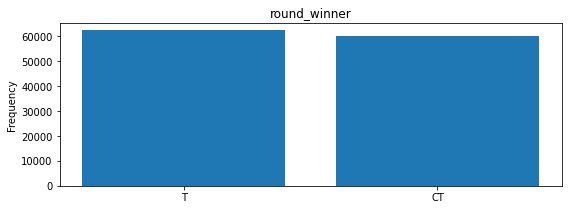

round_winner: 
 T     62406
CT    60004
Name: round_winner, dtype: int64


In [ ]:
bar_plot('round_winner')

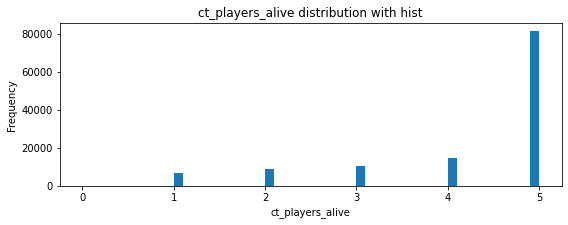

In [ ]:
plot_hist('ct_players_alive')

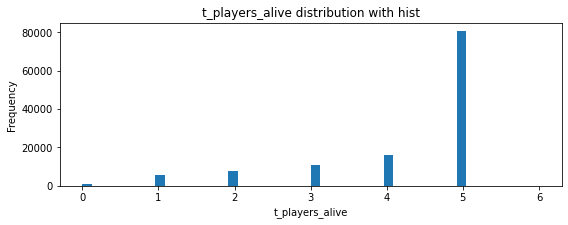

In [ ]:
plot_hist('t_players_alive')

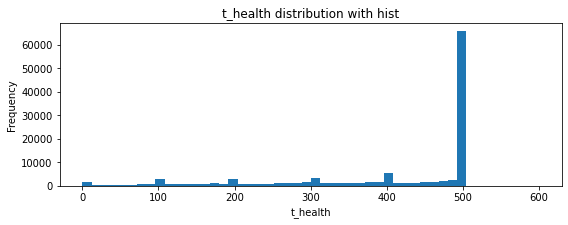

In [ ]:
plot_hist('t_health')

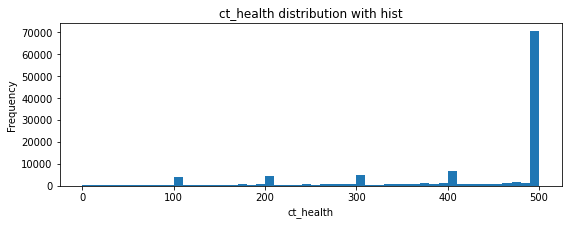

In [ ]:
plot_hist('ct_health')

## Ансамбли

In [ ]:
#1 переведем категориальные переменные в числовые
#2 разобьем на train test

In [ ]:
df = pd.get_dummies(df, columns = ['map', 'bomb_planted'])
df['round_winner'] = df['round_winner'].apply(lambda x: 1 if x == 'CT' else 0)
df.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,bomb_planted_False,bomb_planted_True
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y = df['round_winner']
X = df.drop(['round_winner'], axis = 1)

In [ ]:
X.shape

(122410, 104)

In [ ]:
y.shape

(122410,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_test.shape

(36723, 104)

In [ ]:
y_test.shape

(36723,)

## Bagging

In [ ]:
#обучим лес

In [ ]:
random_forest_clf = RandomForestClassifier(max_depth=3, random_state=42, n_estimators=5)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5, random_state=42)

In [ ]:
y_pred = random_forest_clf.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
for i, estimator in enumerate(random_forest_clf.estimators_):
  export_graphviz(estimator, feature_names = X.columns, out_file = f"{i}_rf.dot", filled=True)

In [ ]:
!dot -Tpng '4_rf.dot' -o '4_rf.png'

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72     18435
           1       0.72      0.71      0.71     18288

    accuracy                           0.72     36723
   macro avg       0.72      0.72      0.72     36723
weighted avg       0.72      0.72      0.72     36723



In [ ]:
#визуализируем деревья в лесу

In [ ]:
#то же самое, только с помощью GridSearchView

In [ ]:
rfc =RandomForestClassifier(random_state=42)
params_grid = { 
    'n_estimators': [5, 10],
    'max_depth': [4,5,6],
    'criterion': ['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=params_grid, cv=5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6], 'n_estimators': [5, 10]})

In [ ]:
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

In [ ]:
y_pred  = CV_rfc.predict(X_test)

In [ ]:
for i, estimator in enumerate(CV_rfc.best_estimator_.estimators_):
  export_graphviz(estimator, feature_names = X.columns, out_file = f"{i}_rf.dot", filled=True)

In [ ]:
!dot -Tpng '4_rf.dot' -o '4_rf.png'

In [ ]:
#сравнить метрики

## Stacking

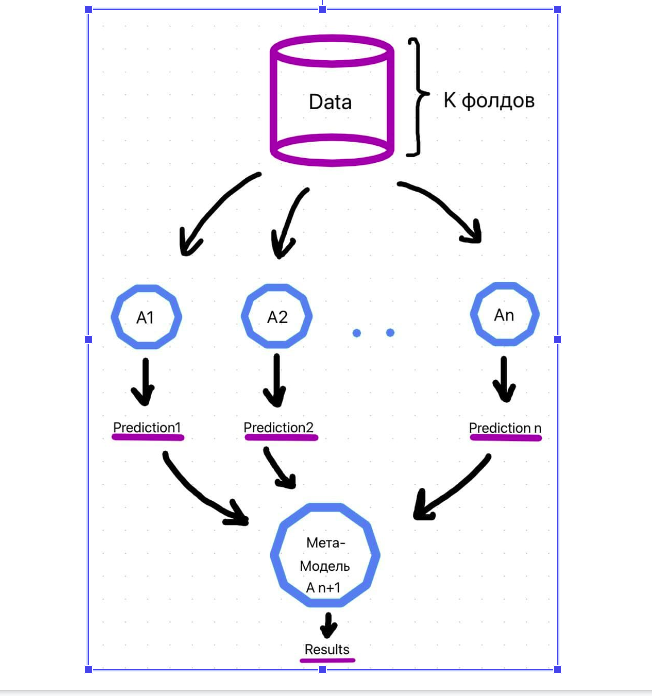

In [ ]:
#сделать несколько эстиматоров

In [ ]:
from sklearn.svm import LinearSVC

#базовые простые алгоритмы
estimators = [
    ('rf', RandomForestClassifier(n_estimators=3, random_state=42)),
    ('svc', LinearSVC(random_state=42))
]

In [ ]:
meta_estimator = LogisticRegression(random_state=42)

In [ ]:
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(estimators= estimators, final_estimator=meta_estimator)

In [ ]:
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     18669
           1       0.80      0.80      0.80     18054

    accuracy                           0.80     36723
   macro avg       0.80      0.80      0.80     36723
weighted avg       0.80      0.80      0.80     36723

